In [46]:
#libraries to use for this exercise (run this cell first):
import numpy as np
from matplotlib import pyplot as plt

In [14]:
#load the data from ex1, which should be stored in a matrix. 
#Here I'm using np.matrix datatype, where each row is am array and the whole matrix is an array of rows. 
#Note: the first column is indexed at 0, just like every other indexing in Python, which is different to Matlab.
file = open("ex1/ex1data1.txt")
fileread=file.readlines()
#print (fileread)
#print (type(fileread))
#print (len(fileread))
data=[]
for line in fileread:
    data.append(line.rstrip("\n").split(','))
dt=[]
for line in data:
    line = [float(x) for x in line]
    #print (line)
    dt.append(line)
#print (dt)
dt=np.matrix(dt)
#print (dt)

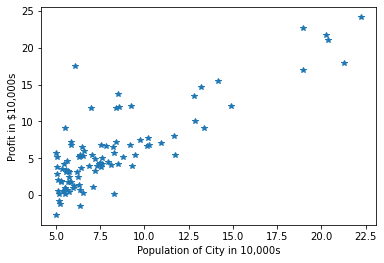

In [9]:
#Visualize the data using Matplotlib and decide if a linear regression woule be appropriate.
plt.plot(dt[:, 0], dt[:, 1], '*')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

In [10]:
#Define the cost function.
def cost(X, y, theta):
    m = len(y)
    Z=X*theta-y
    J=np.transpose(Z)*Z
    J=J/(2*m)
    return J[0]

In [15]:
#Initialize the X and y in this problem by adding bias to X.
X=dt[:, 0]
X0 = np.ones((len(X),1))
Xnew = np.hstack((X0,X))
y=dt[:, 1]

In [16]:
#Initialize the proposed theta for testing if the cost function works.
theta=[[-1],
      [2]]
print (cost(Xnew, y, theta))

[[54.24245508]]


In [19]:
#Define the gradient descent function, which updates theta to find the optimal
#The optimal theta is defined to find the minimum cost, so we also store the respective cost for each iteration.
#Note: in this function, J_history is also a matrix
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    i=0
    while i < num_iters:
        theta = np.transpose((np.transpose(theta) - (np.transpose(X*theta-y))*X*alpha/m))
        a = cost(X, y, theta)
        J_history[i] = a
        i+=1
    return theta, J_history

In [20]:
#Initialize the theta to be 0 for all features.
#assign desired numbers to iteration and alpha, which will be used by the Gradient Descent function.
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01

In [25]:
#Try computing the theta optimal and see if the function works.
theta = gradientDescent(Xnew, y, theta, alpha, iterations)[0]
print ('Theta computed from gradient descent:',theta[0],theta[1])

Theta computed from gradient descent: [[-3.89459687]] [[1.1929147]]


In [22]:
#Try storing the cost of each iteration in J_history.
#Create a matrix to store a sequence of iteration numbers concretely from 1 to the max number of iterations
J_history = gradientDescent(Xnew, y, theta, 0.01, iterations)[1]
ite=np.zeros((iterations, 1))
i=1
while i<=iterations:
    ite[i-1]=i
    i+=1
findoptimal = np.hstack((J_history,ite))

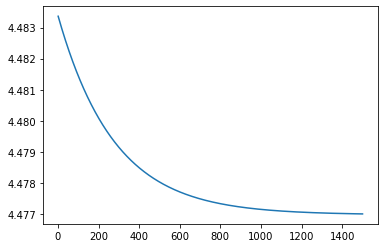

In [23]:
#plot the cost against iteration times
plt.plot(findoptimal[:, 1], findoptimal[:, 0])
plt.show()

In [26]:
#Define a multi feature linear regression cost funtion, which is just basically the same as one feature.
def costMulti(X, y, theta):
    m = len(y)
    Z=X*theta-y
    J=np.transpose(Z)*Z
    J=J/(2*m)
    return J[0]

In [27]:
#Define a multi feature linear regression gradient descent funtion, which is just basically the same as one feature.
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    i=0
    while i < num_iters:
        theta = np.transpose((np.transpose(theta) - (np.transpose(X*theta-y))*X*alpha/m))
        a = cost(X, y, theta)
        J_history[i] = a
        i+=1
    return theta, J_history

In [29]:
#Load the second data set for multi feature linear regression exercise.
file2 = open("ex1/ex1data2.txt")
fileread2=file2.readlines()
data2=[]
for line in fileread2:
    data2.append(line.rstrip("\n").split(','))
dt2=[]
for line in data2:
    line = [float(x) for x in line]
    #print (line)
    dt2.append(line)
#print (dt)
dt2=np.matrix(dt2)
#print (dt2)

In [32]:
#add bias to X
X=dt2[:, 0:2]
X0 = np.ones((len(X),1))
Xnew = np.hstack((X0,X))
y=dt2[:, 2]

In [37]:
#initialize the initial theta to all 0s.
theta = []
for i in range(3):
    theta.append([0])
#print(theta)

In [34]:
#try out different alpha and find the optimal one
J_history = gradientDescentMulti(Xnew, y, theta, 0.0000000018, 400)[1]
ite=np.zeros((400, 1))
i=1
while i<=400:
    ite[i-1]=i
    i+=1
findoptimal = np.hstack((J_history,ite))

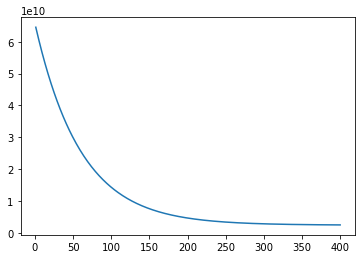

In [35]:
#plot the cost against iterations
plt.plot(findoptimal[:, 1], findoptimal[:, 0])
plt.show()

In [39]:
#Compute the optimal theta by using the optimal alpha and number of iterations.
theta = np.zeros((3, 1))
alpha = 0.0000000018
theta = gradientDescent(Xnew, y, theta, alpha, 400)[0]
print ('Theta computed from gradient descent:',theta[0],theta[1],theta[2])

Theta computed from gradient descent: [[0.0759347]] [[159.52757954]] [[0.24236007]]


In [40]:
#Define a normalisation function
def normalise(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    return X_norm

In [41]:
#Try normalising X and y
X_norm=normalise(X)
X0 = np.ones((len(X),1))
Xnew2 = np.hstack((X0,X_norm))
y_norm=normalise(y)

In [43]:
#do the same after nnormalisation
J_history = gradientDescentMulti(Xnew2, y_norm, theta, 0.01, 400)[1]
ite=np.zeros((400, 1))
i=1
while i<=400:
    ite[i-1]=i
    i+=1
findoptimal = np.hstack((J_history,ite))

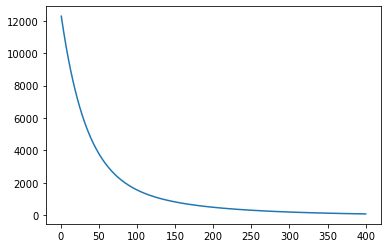

In [44]:
#plot the cost after normalisation
plt.plot(findoptimal[:, 1], findoptimal[:, 0])
plt.show()

In [45]:
#find the optimal theta
theta = np.zeros((3, 1))
alpha = 0.02
theta = gradientDescent(Xnew2, y_norm, theta, 0.01, 400)[0]
print ('Theta computed from gradient descent:',theta[0],theta[1],theta[2])

Theta computed from gradient descent: [[-1.10851045e-16]] [[0.80363308]] [[0.02641023]]
